In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from minisom import MiniSom

In [7]:
df = pd.read_csv('dataset.csv')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,Name
0,57.602380,21.713217,51.651818,63.154913,47.502589,59.353679,8.753383,20.603756,6.491436,65.020404,8.078522,Dum
1,68.831340,24.314739,57.226875,62.426910,43.188385,51.631825,14.513575,73.935348,20.224595,74.948719,8.554909,Dum
2,26.391291,33.543867,97.815496,62.187730,12.469125,61.804517,33.145005,9.061499,26.646903,46.189500,11.804890,Albukerke
3,67.070432,78.426862,49.097628,48.877788,22.988814,47.411708,85.111717,41.587100,18.941216,64.504611,13.156304,Eugene
4,72.761049,48.364841,68.367300,44.169089,19.685162,68.107181,83.206047,52.037685,5.547961,74.685905,12.098432,Eugene


In [8]:
df = df.loc[df['Name'].isin(['Albukerke', 'Baxan', 'Dum']), ['I', 'J', 'G', 'D', 'E', 'Name']].reset_index(drop=True)
df.head()

,I,J,G,D,E,Name
0,6.491436,65.020404,8.753383,63.154913,47.502589,Dum
1,20.224595,74.948719,14.513575,62.426910,43.188385,Dum
2,26.646903,46.189500,33.145005,62.187730,12.469125,Albukerke
3,15.676441,49.242872,55.864204,78.196325,8.671908,Baxan
4,8.930248,41.795681,48.303592,54.224003,4.611418,Baxan


In [9]:
# converting type of columns to 'category'
df['Name'] = df['Name'].astype('category')
# Assigning numerical values and storing in another column
df['Name_Cat'] = df['Name'].cat.codes
# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
# passing names-cat column (label encoded values of names)
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Name_Cat']]).toarray(), columns=['Albukerke', 'Baxan', 'Dum'])
df = pd.concat([df, encoder_df], axis=1)
df.head()

,I,J,G,D,E,Name,Name_Cat,Albukerke,Baxan,Dum
0,6.491436,65.020404,8.753383,63.154913,47.502589,Dum,2,0.0,0.0,1.0
1,20.224595,74.948719,14.513575,62.426910,43.188385,Dum,2,0.0,0.0,1.0
2,26.646903,46.189500,33.145005,62.187730,12.469125,Albukerke,0,1.0,0.0,0.0
3,15.676441,49.242872,55.864204,78.196325,8.671908,Baxan,1,0.0,1.0,0.0
4,8.930248,41.795681,48.303592,54.224003,4.611418,Baxan,1,0.0,1.0,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['I', 'J', 'G', 'D', 'E', 'Name_Cat', 'Albukerke', 'Baxan', 'Dum']], df['Name'], test_size=0.33, random_state=42)

In [11]:
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)

In [12]:
# scaling features to the [0; 1] range
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train

array([[0.37436534, 0.71641365, 0.38073745, ..., 0.        , 0.        ,
        1.        ],
       [0.34043136, 0.66560919, 0.53423927, ..., 1.        , 0.        ,
        0.        ],
       [0.76680276, 0.55929837, 0.19310142, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.19226492, 0.845033  , 0.2755945 , ..., 0.        , 0.        ,
        1.        ],
       [0.23783141, 0.72094774, 0.3227465 , ..., 0.        , 0.        ,
        1.        ],
       [0.70628386, 0.37446814, 0.65645116, ..., 1.        , 0.        ,
        0.        ]])

In [33]:
som_shape = (3, 1)
data_shape = X_train.shape

In [34]:
# Initialization and training
som = MiniSom(som_shape[0], som_shape[1], data_shape[1], sigma=.5, learning_rate=.5)
som.random_weights_init(X_train)
print("Training...")
som.train_batch(X_train, 1000)  # random training
print("\n...ready!")

Training...

...ready!


In [35]:
winner_coors = np.array([som.winner(x) for x in X_train]).T
cluster_index = np.ravel_multi_index(winner_coors, som_shape)

In [36]:
x_train_df = pd.DataFrame(X_train, columns=['I', 'J', 'G', 'D', 'E', 'Name_Cat', 'Albukerke', 'Baxan', 'Dum'])
x_train_df['Expected'] = y_train
x_train_df['Clusters'] = cluster_index

In [37]:
x_train_df.head(20)

,I,J,G,D,E,Name_Cat,Albukerke,Baxan,Dum,Expected,Clusters
0,0.374365,0.716414,0.380737,0.375481,0.529926,1.0,0.0,0.0,1.0,Dum,2
1,0.340431,0.665609,0.534239,0.313023,0.317136,0.0,1.0,0.0,0.0,Albukerke,0
2,0.766803,0.559298,0.193101,0.426168,0.306906,1.0,0.0,0.0,1.0,Dum,2
3,0.551198,0.275252,0.423501,0.369627,0.303688,0.0,1.0,0.0,0.0,Albukerke,0
4,0.160185,0.914537,0.287580,0.290311,0.727604,1.0,0.0,0.0,1.0,Dum,2
5,0.477532,0.341744,0.634703,0.383796,0.190073,0.5,0.0,1.0,0.0,Baxan,1
6,0.883468,0.760451,0.648565,0.384825,0.144605,0.5,0.0,1.0,0.0,Baxan,1
7,0.836402,0.360851,0.575430,0.261044,0.120613,0.5,0.0,1.0,0.0,Baxan,1
8,0.354912,0.981530,0.627005,0.658825,0.030615,0.5,0.0,1.0,0.0,Baxan,1
9,0.363491,0.881246,0.488601,0.420999,0.678757,1.0,0.0,0.0,1.0,Dum,2


In [25]:
som_shape = (10, 10)

In [26]:
# Initialization and training
som = MiniSom(som_shape[0], som_shape[1], data_shape[1], sigma=.5, learning_rate=.5)
som.random_weights_init(X_train)
print("Training...")
som.train_batch(X_train, 10000)  # random training
print("\n...ready!")

Training...

...ready!


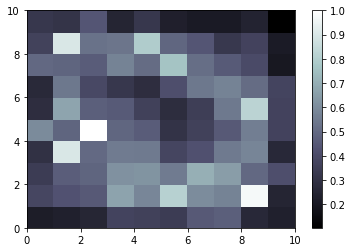

In [27]:
# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

In [28]:
target = y_train.to_numpy()
t = np.zeros(len(target), dtype=int)
t[target == 'Dum'] = 0
t[target == 'Albukerke'] = 1
t[target == 'Baxan'] = 2

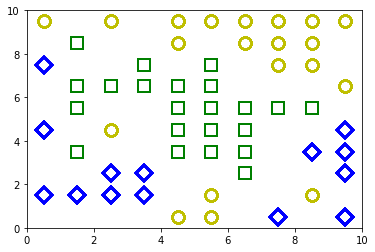

In [29]:
# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['y', 'g', 'b'] # (blue - Dum, green - Albukerke, yellow - Baxan)
for cnt, xx in enumerate(X_train):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, som_shape[0], 0, som_shape[1]])

plt.show()